# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[67, 21, 49, ..., 41, 17, 98],
       [37, 64, 30, ...,  6, 35, 10],
       [ 6, 84, 84, ..., 23, 14, 90],
       ...,
       [50, 64, 84, ..., 12, 22, 55],
       [20, 41, 97, ..., 69, 39, 18],
       [ 3, 31, 75, ..., 38, 34, 19]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = A.copy()
np.random.shuffle(B.T)
B

array([[16, 49, 21, ..., 17,  5, 31],
       [51, 30, 64, ..., 35, 33, 95],
       [ 7, 84, 84, ..., 14, 22,  7],
       ...,
       [12, 84, 64, ..., 22, 17, 95],
       [47, 97, 41, ..., 39,  1, 50],
       [54, 75, 31, ..., 34, 68, 81]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [3]:
b = np.amax(A, axis=1) - np.amin(A, axis=1)
np.where(b == np.amax(b))[0][0]

3

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [4]:
C = A.copy()
x = len(A)
y = len(A[0])
(np.argsort(np.argsort(C.reshape(x*y))) + 1).reshape(x,y)


array([[6719, 2130, 4977, ..., 4169, 1667, 9853],
       [3681, 6428, 3011, ...,  658, 3493, 1052],
       [ 601, 8379, 8383, ..., 2322, 1395, 9017],
       ...,
       [5014, 6388, 8370, ..., 1205, 2223, 5569],
       [2068, 4134, 9718, ..., 6919, 3903, 1852],
       [ 351, 3071, 7521, ..., 3831, 3375, 1924]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [5]:
x = len(A)
D = A.copy()
D = (A - np.amin(A, axis=1).reshape(x,1))/(np.amax(A, axis = 1) - np.amin(A, axis=1)).reshape(x,1)
D

array([[0.68367347, 0.21428571, 0.5       , ..., 0.41836735, 0.17346939,
        1.        ],
       [0.37634409, 0.66666667, 0.30107527, ..., 0.04301075, 0.35483871,
        0.08602151],
       [0.06122449, 0.85714286, 0.85714286, ..., 0.23469388, 0.14285714,
        0.91836735],
       ...,
       [0.4787234 , 0.62765957, 0.84042553, ..., 0.07446809, 0.18085106,
        0.53191489],
       [0.19587629, 0.41237113, 0.98969072, ..., 0.70103093, 0.39175258,
        0.17525773],
       [0.02083333, 0.3125    , 0.77083333, ..., 0.38541667, 0.34375   ,
        0.1875    ]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [6]:
C = np.expand_dims(A, axis=0)
C = np.concatenate([C, [A*2, A*3, A*4, A*5, A*6, A*7, A*8, A*9, A*10]])
C

array([[[ 67,  21,  49, ...,  41,  17,  98],
        [ 37,  64,  30, ...,   6,  35,  10],
        [  6,  84,  84, ...,  23,  14,  90],
        ...,
        [ 50,  64,  84, ...,  12,  22,  55],
        [ 20,  41,  97, ...,  69,  39,  18],
        [  3,  31,  75, ...,  38,  34,  19]],

       [[134,  42,  98, ...,  82,  34, 196],
        [ 74, 128,  60, ...,  12,  70,  20],
        [ 12, 168, 168, ...,  46,  28, 180],
        ...,
        [100, 128, 168, ...,  24,  44, 110],
        [ 40,  82, 194, ..., 138,  78,  36],
        [  6,  62, 150, ...,  76,  68,  38]],

       [[201,  63, 147, ..., 123,  51, 294],
        [111, 192,  90, ...,  18, 105,  30],
        [ 18, 252, 252, ...,  69,  42, 270],
        ...,
        [150, 192, 252, ...,  36,  66, 165],
        [ 60, 123, 291, ..., 207, 117,  54],
        [  9,  93, 225, ..., 114, 102,  57]],

       ...,

       [[536, 168, 392, ..., 328, 136, 784],
        [296, 512, 240, ...,  48, 280,  80],
        [ 48, 672, 672, ..., 184, 112, 720

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [7]:
C = np.concatenate((A.T[::2], A.T[1::2])).T
C

array([[67, 49, 51, ..., 72, 41, 98],
       [37, 30, 13, ..., 18,  6, 10],
       [ 6, 84, 45, ..., 66, 23, 90],
       ...,
       [50, 84, 26, ..., 90, 12, 55],
       [20, 97, 61, ..., 42, 69, 18],
       [ 3, 75, 80, ..., 35, 38, 19]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [277]:
np.sum(np.all(A>5, axis=1) == True)

12

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [8]:
np.mean(np.array(np.split(A, 10)).reshape(1000, 10), axis=1).reshape(20,50)

array([[39.3, 58.9, 35.2, 45.5, 60.1, 39.3, 58.1, 50.1, 51.5, 40.3, 50.2,
        52. , 53. , 29.5, 49.3, 55.1, 52.9, 42.8, 47.6, 64.1, 59.2, 47.8,
        45.1, 40.7, 59. , 52.7, 51.1, 50.7, 49.4, 56. , 58.1, 55.8, 54.7,
        48.2, 51.6, 51. , 42.1, 63.5, 54.5, 68.1, 44.8, 55.3, 43.2, 55. ,
        45.7, 59.6, 52.9, 48. , 48.6, 53.8],
       [63. , 52.1, 58.9, 48.1, 51.9, 39.2, 50.9, 45.7, 51.9, 44.3, 46.5,
        45.1, 58.6, 44.8, 40.1, 52.4, 45.9, 51.9, 53.7, 43.5, 43.1, 45.6,
        49.2, 44.9, 63.2, 44.2, 44.5, 45.6, 59.8, 43.3, 57.5, 47.7, 62.5,
        52.8, 58.8, 62.7, 41. , 39.1, 42. , 56.5, 46.2, 58.8, 67.3, 41.5,
        47. , 51.8, 45.1, 51.3, 39.1, 44.3],
       [45.2, 47.5, 46.4, 41.5, 48.3, 50.2, 42.1, 60. , 40.8, 60. , 43.4,
        54.5, 44.8, 47.8, 20.3, 41.9, 64.8, 58.8, 58.2, 55.5, 57.5, 63.8,
        61.6, 59.7, 59.6, 51.2, 50.6, 49.6, 51.3, 62.6, 40. , 55.4, 44.5,
        59.3, 53.3, 63.4, 59.6, 41.2, 65.9, 49.6, 56.3, 37.7, 65.6, 49. ,
        39.9, 47.1, 52

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [9]:
C = A.copy()
np.unique(C)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [10]:
C = np.sqrt(np.sum(np.square(A - np.mean(A, axis=0)), axis=1))
C

array([210.73594378, 191.3244574 , 215.89920797, 202.97346625,
       211.55920684, 201.73990185, 205.48646671, 207.2153421 ,
       207.03982226, 179.48603845, 198.34908117, 192.69597297,
       224.08234647, 200.06488448, 206.07857239, 178.37213347,
       198.43091493, 216.9154628 , 194.98494301, 193.74843999,
       198.15382409, 210.97094113, 221.97985945, 219.02901178,
       188.93678308, 208.72083748, 194.95180943, 199.13723409,
       212.33892248, 212.97405476, 198.32243443, 181.4850352 ,
       203.91296673, 198.69435825, 202.12275478, 199.25021455,
       188.98753398, 180.81913063, 205.62329148, 206.75697812,
       216.411825  , 216.27724799, 198.2634056 , 198.51835683,
       199.4158419 , 200.09309833, 211.55856872, 202.78766728,
       199.53497939, 187.06615942, 194.48942902, 186.46755214,
       203.01405863, 225.71441691, 210.3142601 , 189.86510475,
       215.43135334, 206.28957317, 188.09427955, 183.2874191 ,
       191.79199149, 197.5434332 , 213.14084076, 160.17

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [11]:
C = A.copy()
np.where(C<50, C*2, C*3)

array([[201,  42,  98, ...,  82,  34, 294],
       [ 74, 192,  60, ...,  12,  70,  20],
       [ 12, 252, 252, ...,  46,  28, 270],
       ...,
       [150, 192, 252, ...,  24,  44, 165],
       [ 40,  82, 291, ..., 207,  78,  36],
       [  6,  62, 225, ...,  76,  68,  38]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [12]:
C = A.copy()
C = C.reshape(200*50)
print(C)
def mov_avg(arr, n):
    res = np.cumsum(arr, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return res[n-1:]/n

print(mov_avg(C,3))
print(mov_avg(C,5))
print(mov_avg(C,10))
print(mov_avg(C,3) + np.append(mov_avg(C,5), [0,0]) + np.append(mov_avg(C,10), [0,0,0,0,0,0,0]))

[67 21 49 ... 38 34 19]
[45.66666667 23.33333333 33.33333333 ... 29.         28.66666667
 30.33333333]
[37.6 24.2 38.4 ... 36.2 33.  28. ]
[39.3 40.  44.1 ... 56.  51.8 48.1]
[122.56666667  87.53333333 115.83333333 ...  57.          28.66666667
  30.33333333]


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

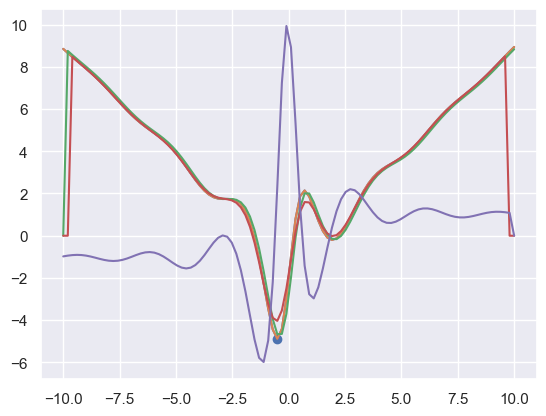

In [13]:
import scipy

def f(x):
    return (5*np.sin(2*x) - (np.cos(x))**2 - 1 + abs(x**3) - x**2)/(x**2+1)

x = np.linspace(-10, 10, 100)

fig, ax=plt.subplots()

f_diff = np.append(np.diff(f(x))/0.2, 0)

def mov_avg(arr, n):
    res = np.cumsum(arr, dtype=float)
    res[n:] = res[n:] - res[:-n]
    return res[n-1:]/n
avg_1 = mov_avg(f(x), 1)
avg_2 = mov_avg(f(x), 2)
avg_5 = mov_avg(f(x), 5)
# print(avg_1)
avg_2 = np.insert(avg_2, 0, 0)
avg_5 = np.insert(avg_5, 0, [0,0])
avg_5 = np.append(avg_5, [0,0])
# np.append(avg_2, 0)
ax.plot(x, f(x))
ax.plot(x, avg_1)
ax.plot(x, avg_2)
ax.plot(x, avg_5)
ax.plot(x, f_diff)
ax.scatter(scipy.optimize.golden(f, full_output=True)[0], scipy.optimize.golden(f, full_output=True)[1])
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [14]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 1, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [15]:
x = np.array([50, 3, 1, 7, 20])
c = np.linspace(0, 3, 3, dtype='int64')
print(np.choose(c, x))

[50  3  7]


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [16]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1891

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [18]:
def walk_np(n: int):
    arr = np.array([-3, -1, 0, 2, 3])
    pos_arr = np.random.choice(5, n)
    return np.sum(np.choose(pos_arr,arr))

walk_np(10_000)
%timeit walk_np(10_000)
%timeit walk(10_000)

716 µs ± 90.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
8.96 ms ± 774 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[1890. 2172. 2104. 2004. 1786. 2219. 2047. 2025. 2267. 2121. 2032. 2062.
 1810. 2235. 1661. 1943. 1891. 2292. 2289. 2083. 1398. 2146. 1970. 1793.
 2004. 1789. 2096. 1831. 2152. 2557. 1721. 1796. 1925. 1735. 1835. 2068.
 1831. 2372. 1705. 1734. 2007. 1744. 1578. 2326. 2197. 2223. 1901. 2144.
 1803. 1660. 1985. 1573. 1841. 2135. 1776. 2059. 1717. 2066. 2320. 1885.
 1847. 2084. 2063. 1691. 2002. 1810. 2094. 1512. 2284. 2233. 2320. 1994.
 2012. 1704. 1694. 1923. 2261. 2169. 1745. 1958. 1858. 1804. 1997. 1928.
 2052. 1836. 2025. 2063. 2073. 2331. 2047. 1992. 2168. 2020. 2329. 1554.
 2168. 2388. 2181. 2083.]


<AxesSubplot: ylabel='Density'>

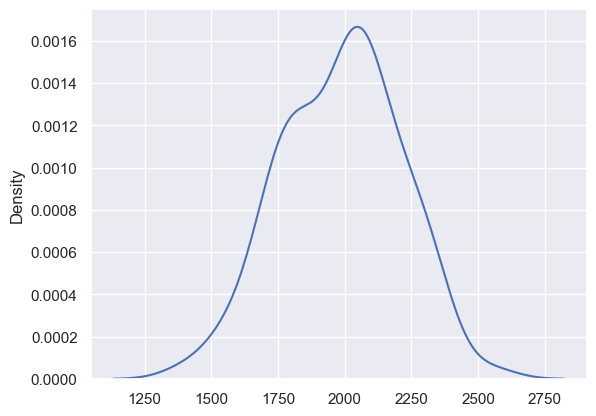

In [19]:
tmp = np.array([])
for i in range(100):
    tmp = np.append(tmp, walk_np(10_000))
print(tmp)    
sns.kdeplot(tmp)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [6]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.2810749618657322

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [1]:
%load_ext cython

In [5]:
%%cython
import numpy as np

cdef int max(int a, int b):
    return a if a > b else b

cdef int chebyshev(int x1, int y1, int x2, int y2):
    return max(abs(x1 - x2), abs(y1 - y2))

def c_benchmark():
    a = np.random.rand(1000, 2)
    b = np.random.rand(1000, 2)
    
    for x1, y1 in a:
        for x2, y2 in b:
            chebyshev(x1, x2, y1, y2)

DistutilsPlatformError: Unable to find vcvarsall.bat

In [22]:
import taichi as ti

ti.init()

@ti.kernel
def strange_conv(a: ti.types.ndarray()) -> ti.f64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    ti.loop_config(serialize=True) 
    for j, i in ti.ndrange(x-3, y-5):
        c = 1.5 * a[i+1, j+2] - a[i+5, j+3] * a[i, j] + 0.2 * a[i+4, j]
        t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)

[Taichi] version 1.2.2, llvm 10.0.0, commit 608e4b57, win, python 3.10.0
[Taichi] Starting on arch=x64


0.30018118023872375